# Homework 2

# Part 1: Expected Prediction Risk (EPR) 

The Expected Prediction Risk (EPR) is a fundamental concept that helps us measure how well our predictions match reality, accounting for all possible scenarios weighted by their probability of occurrence. Consider a supervised learning problem with a dataset $(x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i$ are the labels (being them real numbers or categorical). We assume that the data is generated by a joint distribution, with density function $p(x,y)$. We fit a model $f(x)$ to this dataset. 

Given a measure of risk $L(y, f(x))$, the Expected Prediction Risk (EPR) is defined as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[L(Y, f(X))]$$


First, let us consider the regression case.

Consider a dataset $\mathcal{D}_{regr} = (x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$.

We have seen in the class that in regression cases, the squared loss is a natural choice. Consider the squared loss function $L(y, f(x)) = (y - f(x))^2$. We define the Expected Prediction Risk (EPR) as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[(Y - f(X))^2]$$

### **Q1**: Simplify the expression of the EPR(f) to obtain that the EPR is minimized by the conditional mean of Y given X.

We apply the law of total expectation:
$$
\text{EPR}[f] = \mathbb{E}_X\left[ \mathbb{E}_{Y \mid X}[(Y - f(X))^2 \mid X] \right]
$$

Define the inner term:
$$
\phi(f(x)) = \mathbb{E}[(Y - f(x))^2 \mid X = x]
$$

Expand and differentiate:
$$
\phi(f(x)) = \mathbb{E}[Y^2 \mid X = x] - 2f(x)\mathbb{E}[Y \mid X = x] + f(x)^2
$$
$$
\frac{d}{df(x)}\phi(f(x)) = -2\mathbb{E}[Y \mid X = x] + 2f(x)
$$

Setting the derivative to zero:
$$
f(x) = \mathbb{E}[Y \mid X = x]
$$

Which is indeed the conditional mean of Y given X.

$$
\square
$$

Let us consider now a categorical dataset. In order to highlight the difference with the regression case, we will use a different notation to highlight the difference: $\mathcal{D}_{class} = (x_i, c_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $c_i \in \{1, \ldots, K\}$ is the true class of the $i$-th sample. We fit a model $\hat{c}(x){\in \{1, \ldots, K\}}$ to this dataset.

### **Q2** Write the expression of the EPR for the classification case simplified as much as possible for general risk functions.

Let the prediction model be $ \hat{c}(x) \in \{1, \dots, K\} $, and let $ L(c, \hat{c}) $ be a general loss function.

The EPR is:
$$
\text{EPR}[\hat{c}] = \mathbb{E}_{X,C}[L(C, \hat{c}(X))]
$$

Using the law of total expectation:
$$
\text{EPR}[\hat{c}] = \mathbb{E}_X\left[ \sum_{k=1}^K P(C = k \mid X) \cdot L(k, \hat{c}(X)) \right]
$$

$$
\square
$$


### **Q3** Find the optimal classifier for 0-1 loss: $L(c, \hat{c}) = \mathbb{I}(c \neq \hat{c})$ known as the Bayes classifier.


Apply the 0-1 loss definition, the EPR becomes:
$$
\text{EPR}[\hat{c}] = \mathbb{E}_X\left[ \sum_{k=1}^K P(C = k \mid X) \cdot \mathbb{I}(k \ne \hat{c}(X)) \right]
$$

This simplifies to:
$$
\text{EPR}[\hat{c}] = \mathbb{E}_X\left[ 1 - P(C = \hat{c}(X) \mid X) \right]
$$

To minimize this, we maximize $ P(C = \hat{c}(X) \mid X) $.  
So the optimal classifier is:
$$
\hat{c}^*(x) = \argmax_{k \in \{1, \dots, K\}} P(C = k \mid X = x)
$$

$$
\square
$$

Let us apply these concepts to Gaussian Mixture Models. Let us fix the number of components $K=3$ and consider the following model for the joint distribution $p(x,c)$:

$$p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$$
$$p(c_k) = \pi_k$$
where $\pi_k$ are the probabilities of the different classes, $\mu_k$ are the means and $\Sigma_k$ are the covariance matrices of the $k$-th component.



### **Q4** Write a python function that generates samples from this model.



In [1]:
import numpy as np

In [2]:
def sample_gmm(n_samples, pi, mus, sigmas, random_state=None):

    if random_state is not None:
        np.random.seed(random_state)

    K = len(pi)
    d = mus[0].shape[0]
    labels = np.random.choice(K, size=n_samples, p=pi)

    X = np.zeros((n_samples, d))
    for k in range(K):
        idx = labels == k
        n_k = np.sum(idx)
        if n_k > 0:
            X[idx] = np.random.multivariate_normal(mean=mus[k], cov=sigmas[k], size=n_k)

    return X, labels

### **Q5** Take now 1000 samples from this model and plot them using matplotlib using the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [0.3, 0.4, 0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$$


In [3]:
import matplotlib.pyplot as plt

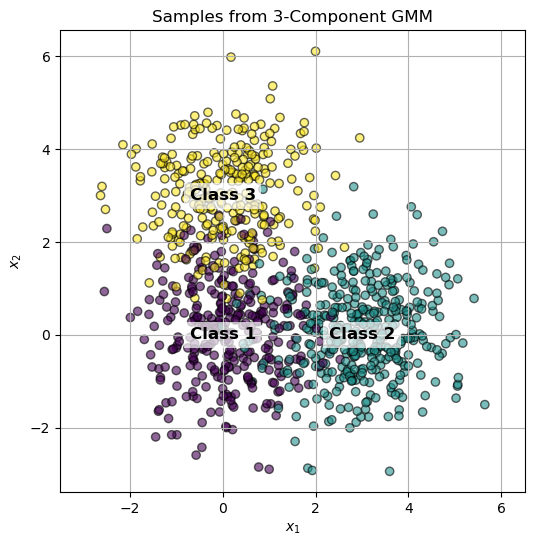

In [4]:
pi = [0.3, 0.4, 0.3]

mus = [
    np.array([0, 0]),
    np.array([3, 0]),
    np.array([0, 3])
]

sigmas = [
    np.array([[1, 0], [0, 1]]),
    np.array([[1, 0], [0, 1]]),
    np.array([[1, 0], [0, 1]])
]


X, labels = sample_gmm(n_samples=1000, pi=pi, mus=mus, sigmas=sigmas, random_state=42)

plt.figure(figsize=(6, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
for i, mu in enumerate(mus):
    plt.text(mu[0], mu[1], f'Class {i+1}', fontsize=12, fontweight='bold',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Samples from 3-Component GMM')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.axis('equal')
plt.show()

We define the decision boundary between two classes $c_i$ and $c_j$ as the set of points where the posterior probability of the two classes is equal. Write the expression of the decision boundary for this model. 

### **Q6** Compute the posterior probabilities for this model.

We were given that GMM has:

- Likelihood: $ p(x \mid c_k) = \mathcal{N}(x \mid \mu_k, \Sigma_k) $
- Prior: $ P(c_k) = \pi_k $


Using Bayes' theorem, the posterior is:

$$
P(c_k \mid x) = \frac{p(x \mid c_k) \cdot \pi_k}{\sum_{j=1}^K p(x \mid c_j) \cdot \pi_j}
$$

with:
$$
p(x \mid c_k) = \mathcal{N}(x \mid \mu_k, \Sigma_k)
= \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left( -\frac{1}{2}(x - \mu_k)^\top \Sigma_k^{-1}(x - \mu_k) \right)
$$

$$
\square
$$

### **Q7A** Compute analytically the decision boundary between class 1 and class 2.

We solve:
$$
P(c_1 \mid x) = P(c_2 \mid x)
\Rightarrow p(x \mid c_1)\pi_1 = p(x \mid c_2)\pi_2
$$

Notice that all $\Sigma$ are identity matrices, i.e. we have identity covariances for both Gaussian distribution:
$$
\exp\left(-\frac{1}{2} \|x - \mu_1\|^2\right)\pi_1 = \exp\left(-\frac{1}{2} \|x - \mu_2\|^2\right)\pi_2
$$

Take log and rearrange:
$$
\|x - \mu_2\|^2 - \|x - \mu_1\|^2 = 2 \log\left(\frac{\pi_2}{\pi_1}\right)
$$

Plug in:
- $ \mu_1 = [0, 0], \mu_2 = [3, 0] $
- $ \pi_1 = 0.3, \pi_2 = 0.4 $

Compute:
$$
(x_1 - 3)^2 - x_1^2 = 2 \log\left(\frac{4}{3}\right)
\Rightarrow -6x_1 + 9 = 2 \log\left(\frac{4}{3}\right)
\Rightarrow x_1 \approx \frac{9 - 2 \log(4/3)}{6} \approx \boxed{1.404}
$$

$$
\square
$$

### **Q7B** Plot the optimal decision boundary for this model using the above calcultations. 


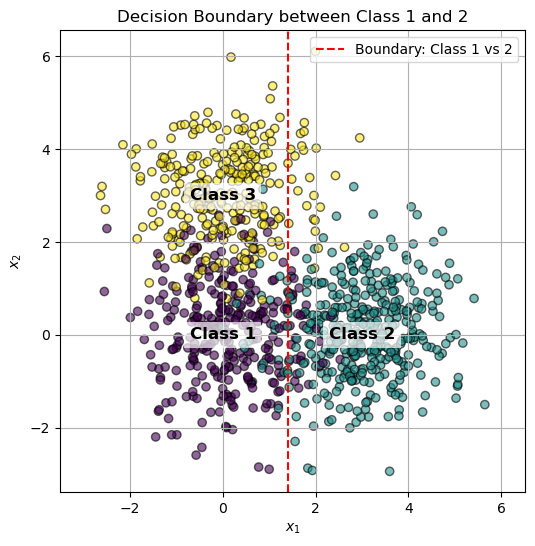

In [5]:
x1_boundary = (9 - 2 * np.log(4 / 3)) / 6

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
plt.axvline(x=x1_boundary, color='red', linestyle='--', label='Boundary: Class 1 vs 2')

# Add class labels near the means
for i, mu in enumerate(mus):
    plt.text(mu[0], mu[1], f'Class {i+1}', fontsize=12, fontweight='bold',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision Boundary between Class 1 and 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

### **Q8** Compute the error of the Bayes classifier on the dataset in Q5 as measured by the misclassification rate.


To compute the error:
1. For each sample $ x_i $, compute $ P(c_k \mid x_i) $ for all $ k $ using Bayes theorem.
2. Predict class $ \hat{c}^*(x_i) = \arg\max_k P(c_k \mid x_i) $
3. Compare with true label $ c_i $
4. Error = fraction of incorrect predictions.

In [6]:
from scipy.stats import multivariate_normal

In [7]:
def compute_bayes_error(X, true_labels, pi, mus, sigmas):
    K = len(pi)
    n = X.shape[0]
    posteriors = np.zeros((n, K))

    # Compute posteriors P(c_k | x_i)
    for k in range(K):
        rv = multivariate_normal(mean=mus[k], cov=sigmas[k])
        posteriors[:, k] = pi[k] * rv.pdf(X)
    posteriors /= posteriors.sum(axis=1, keepdims=True)

    # Bayes predictions = class with highest posterior
    preds = np.argmax(posteriors, axis=1)

    # Compute misclassification rate
    error_rate = np.mean(preds != true_labels)
    return error_rate

In [8]:
error = compute_bayes_error(X, labels, pi, mus, sigmas)
print(f"Bayes classifier error rate: {error:.4f}")

Bayes classifier error rate: 0.0990


Consider now the case where the covariance matrices are different. Take the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$: 

$$\pi = [\pi_1=0.3, \pi_2=0.4, \pi_3=0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array}\right]$$

### **Q9** What is the decision boundary between class 1 and class 2 in this case?
Note: a fully analytical or functional solution might be difficult to obtain; only an interpretable and practical solution for plotting is required.


With non-identity covariances we can no longer simply solve the equation, because the boundary is no longer linear. Instead we:

1.	Create a 2D grid of x valuesvaluate the posterior for class 1 and class 2 over it.
2.	Subtract the posteriors: $ P(c_1 \mid x) - P(c_2 \mid x)$
3.	The zero contour of this difference defines the boundary — that’s where the model is equally likely to assign a point to class 1 or class 2.

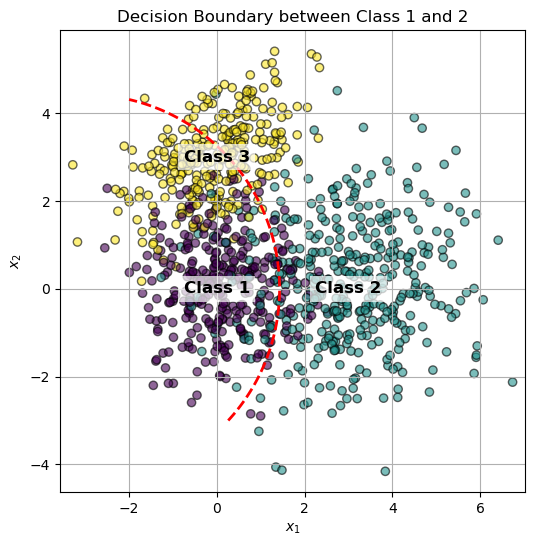

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Generate new dataset from updated parameters (Q9)
pi = [0.3, 0.4, 0.3]
mus = [
    np.array([0, 0]),
    np.array([3, 0]),
    np.array([0, 3])
]
sigmas_hetero = [
    np.array([[1, 0], [0, 1]]),
    np.array([[2, 0], [0, 2]]),
    np.array([[1, 0.5], [0.5, 1]])
]

# Generate samples and labels (optional visualization aid)
X_hetero, labels_hetero = sample_gmm(n_samples=1000, pi=pi, mus=mus, sigmas=sigmas_hetero, random_state=42)

# Build evaluation grid
x1 = np.linspace(-2, 6, 300)
x2 = np.linspace(-3, 5, 300)
xx1, xx2 = np.meshgrid(x1, x2)
grid = np.stack([xx1.ravel(), xx2.ravel()], axis=1)

# Compute unnormalized posteriors
p = np.zeros((grid.shape[0], 3))
for k in range(3):
    rv = multivariate_normal(mean=mus[k], cov=sigmas_hetero[k])
    p[:, k] = pi[k] * rv.pdf(grid)

# Normalize to get posterior probabilities
p /= p.sum(axis=1, keepdims=True)

# Reshape posterior difference between class 1 and 2
boundary_hetero = (p[:, 0] - p[:, 1]).reshape(xx1.shape)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(X_hetero[:, 0], X_hetero[:, 1], c=labels_hetero, cmap='viridis', alpha=0.6, edgecolors='k')
plt.contour(xx1, xx2, boundary_hetero, levels=[0], colors='red', linestyles='--', linewidths=2)
for i, mu in enumerate(mus):
    plt.text(mu[0], mu[1], f'Class {i+1}', fontsize=12, fontweight='bold',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
plt.title('Decision Boundary between Class 1 and 2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.axis('equal')
plt.show()

### **Q10** Plot the decision boundary for this model and discuss the difference with the previous case (if any).



The plot is obtained in Q9, as well as some discussions, but here are a bit more.

- The boundary is curved, not straight.
- Class 2, having higher variance, is "softer", so that the decision boundary bends away from its center, reflecting the greater uncertainty.

This highlights how unequal covariances cause the Bayes classifier to adapt its boundary shape to account for the class-specific uncertainty in the feature space.

### **Q11** Sample 1000 points from the heterogeneous model defined after Q8 and plot them. 

See Q9, the plot contains the samples and the contour together. We can observe that the contour looks quite reasonable, as it follows the boundary visually between class 1 and 2.

### **Q12** Compute the error of the Bayes classifier on this dataset.

In [10]:
error_hetero = compute_bayes_error(X_hetero, labels_hetero, pi, mus, sigmas_hetero)
print(f"Bayes classifier error (heterogeneous model): {error_hetero:.4f}")

Bayes classifier error (heterogeneous model): 0.1220
